# Part 2 - Shortest Path Algorithms

## Introduction - 
Dijkstra's Shortest Path Algorithm and A* Algorithm

## Dijkstra's Algorithm

### Task 1 - Pseudocode

### Task 2 - Drawing the Graph

### Task 3 - Manual Implementation

In [87]:
from Part2_Graph import Graph

In [88]:
graph = Graph()

graph.add_edge('A','B',5)
graph.add_edge('A','H',8)
graph.add_edge('A','E',9)
graph.add_edge('B','H',12)
graph.add_edge('B','C',12)
graph.add_edge('B','D',15)
graph.add_edge('C','D',3)
graph.add_edge('C','H',7)
graph.add_edge('C','new_graph',11)
graph.add_edge('C','F',1)
graph.add_edge('D','new_graph',9)
graph.add_edge('E','H',5)
graph.add_edge('E','F',4)
graph.add_edge('E','new_graph',20)
graph.add_edge('F','new_graph',13)
graph.add_edge('F','H',6)

In [89]:
class Dijkstra():
    def __init__(self, graph, start_node, end_node):
        assert start_node in graph.nodes, "Start node must be a node in the Graph"
        self.graph = graph
        self.start_node = self.graph.get_node(start_node)
        self.end_node = self.graph.get_node(end_node)
        self._current_node = self.graph.get_node(start_node)
        self._priority_queue = self._initialize_priority_queue()
        self._visited = {}

    def _initialize_priority_queue(self):
        '''Initializes the priority queue. 
        Adds an entry for the start node with distance 0, and each other node with the distance infinity '''
        priority_queue = []
        # Loop through all nodes in the graph
        for node in self.graph.nodes:
            # Get the node element by its name from the graph
            node = self.graph.get_node(node)
            # If the current node is not the start node, make the initial distance infinity
            if node != self.start_node:
                priority_queue.append((node, float('inf'), None))
            # If the current node is the start node, make the distance 0
            else:
                priority_queue.append((node, 0, node))
        return priority_queue

    @property
    def priority_queue(self):
        '''Returns a version of the priority queue sorted by distance'''
        # Sort the entries of the priority queue by their total distance
        self._priority_queue.sort(key=lambda queue_object: queue_object[1])
        return self._priority_queue
    
    @property
    def __visited(self):
        '''Returns the names of the already visited elements as a set'''
        # Get the keys of all entries in the priority queue
        return set(self._visited.keys())

    def dequeue(self):
        '''Removes the top entry from the priority queue and adds it to the dictionary of visited elements'''
        # Pop the element off the queue and an entry in the visited dictionary
        element = self.priority_queue.pop(0)
        self._visited[element[0].name] = element
        
        return element

    def _get_unvisited_neighbors(self, node):
        '''Gets the set of unvisited neighbors of the current element'''
        # Get unvisited neighbors by subtracting the set of visited nodes from the set of neighbors
        current_neighbors = set(node.get_adjacent_nodes())
        unvisited_neighbors = current_neighbors - self.__visited
        
        return unvisited_neighbors

    def _update_priority_queue(self, current_distance, node_to_update, current_node):
        '''Updates a node's entry in the priority queue if the total distance to this node is less than the previous total distance'''
        # Look for the entry in the priority queue that matches the node we are updating
        for i, (node, distance, previous_node) in enumerate(self._priority_queue):
            if node == node_to_update:
                # If the current distance to the node is shorter than the distance previously entered for the node, update it
                if current_distance < distance:
                    self._priority_queue[i] = (node, current_distance, current_node)
                break

    def _shortest_paths(self):
        '''Calculates the shortest path between the start node and every other node'''
        # While there are nodes in the priority queue
        while self.priority_queue:
            # Grab the first element
            current_node, current_distance, previous_node = self.dequeue()

            # Get the previously unvisited neighbors of the element being visited
            unvisited_neighbors = self._get_unvisited_neighbors(current_node)
            
            # Update the priority queue to reflect the distances 
            for neighbor in unvisited_neighbors:
                neighbor = self.graph.get_node(neighbor)
                distance = self.graph.get_edge(current_node, neighbor).weight + current_distance
                self._update_priority_queue(distance, neighbor, current_node)

    @property     
    def shortest_path(self):
        '''Displays the shortest path between the start node and the end node'''
        # Initialize a path list to store the path taken to the end_node
        path = [self.end_node.name]
        # Call the shortest path method which performs the algorithm to find the shortest paths
        self._shortest_paths()
        # Start at the end
        current_node = self.end_node
        
        # Loop through the nodes until we get back to the beginning,
        # adding the names of the elements to the path as we go
        while current_node != self.start_node:
            previous_node = self._visited[current_node.name][2]
            path.append(previous_node.name)
            current_node = previous_node
        
        # Reverse the list so that it displays the start at the start and the end at the end
        path.reverse()
        
        return path

    @property
    def shortest_distance(self):
        '''Gets the total distance from the start node to the end node'''
        self._shortest_paths()
        
        return self._visited[self.end_node.name][1]

In [76]:
d  = Dijkstra(graph, 'A', 'new_graph')

print(d.shortest_path)
print(d.shortest_distance)

['A', 'E', 'F', 'C', 'new_graph']
25


### Task 4 - Verifying with NetworkX

#### Add the nodes, their positions, and their weights to the graph

In [81]:
import networkx as nx
import matplotlib.pyplot as plt

new_graph = nx.Graph()

# Draw nodes at (x,y positions)
new_graph.add_node('A', pos=(7.5, 44))
new_graph.add_node('B', pos=(35, 57))
new_graph.add_node('C', pos=(64.75, 41))
new_graph.add_node('D', pos=(86.25, 56.5))
new_graph.add_node('E', pos=(12.25, 5.25))
new_graph.add_node('F', pos=(55.75, 20.25))
new_graph.add_node('G', pos=(92.5, 6.25))
new_graph.add_node('H', pos=(32.25, 32.75))

# Draw edges between nodes
new_graph.add_edge('A','B', weight=5)
new_graph.add_edge('A','H', weight=8)
new_graph.add_edge('A','E', weight=9)
new_graph.add_edge('B','H', weight=12)
new_graph.add_edge('B','C', weight=12)
new_graph.add_edge('B','D', weight=15)
new_graph.add_edge('C','D', weight=3)
new_graph.add_edge('C','H', weight=7)
new_graph.add_edge('C','G', weight=11)
new_graph.add_edge('C','F', weight=1)
new_graph.add_edge('D','G', weight=9)
new_graph.add_edge('E','H', weight=5)
new_graph.add_edge('E','F', weight=4)
new_graph.add_edge('E','G', weight=20)
new_graph.add_edge('F','G', weight=13)
new_graph.add_edge('F','H', weight=6)

# Set the pos attribute to the position of each of the nodes
pos = nx.get_node_attributes(new_graph, 'pos')

#### Drawing the graph

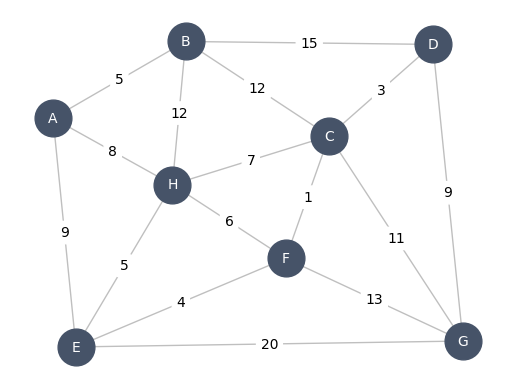

In [94]:
# Draw the nodes
nx.draw_networkx_nodes(new_graph, pos, node_size=700, node_color='#465368')
nx.draw_networkx_labels(new_graph, pos, labels={node: node for node in new_graph.nodes()}, font_color='white', font_size=10, font_family="sans-serif")

# Draw the edges
nx.draw_networkx_edges(new_graph, pos, alpha=0.5, edge_color="gray")
edge_labels = nx.get_edge_attributes(new_graph, "weight")
nx.draw_networkx_edge_labels(new_graph, pos, edge_labels, rotate=False)

plt.axis("off")
plt.show()

#### Get and Draw Dijkstra's Shortest Path between A and Every Other Node


Shortest path between A and B: ['A', 'B']
Distance: 5


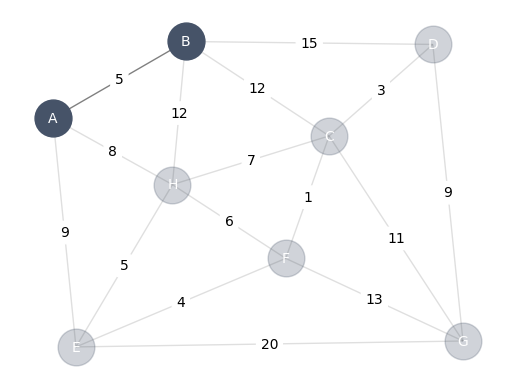


Shortest path between A and C: ['A', 'E', 'F', 'C']
Distance: 14


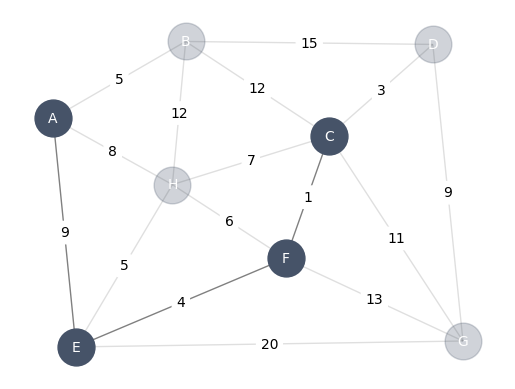


Shortest path between A and D: ['A', 'E', 'F', 'C', 'D']
Distance: 17


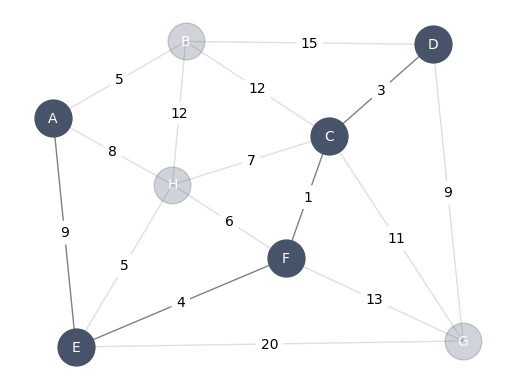


Shortest path between A and E: ['A', 'E']
Distance: 9


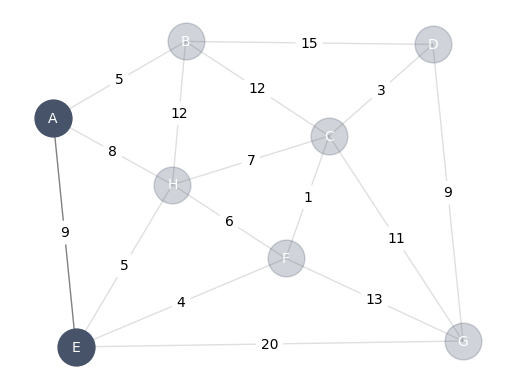


Shortest path between A and F: ['A', 'E', 'F']
Distance: 13


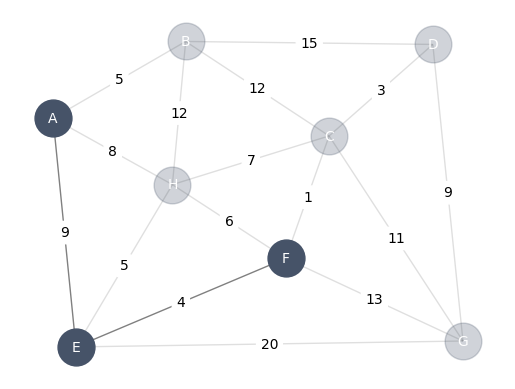


Shortest path between A and G: ['A', 'E', 'F', 'C', 'G']
Distance: 25


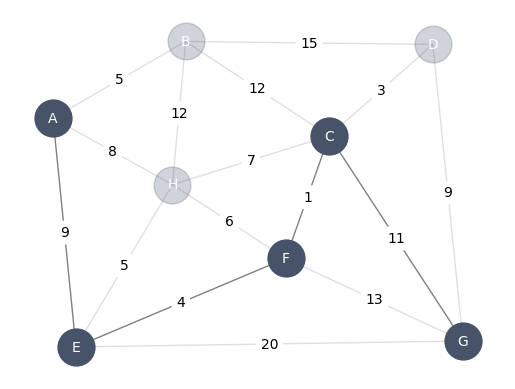


Shortest path between A and H: ['A', 'H']
Distance: 8


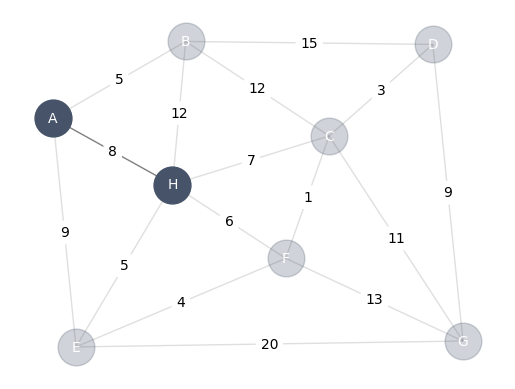

In [112]:
def get_edges_from_shortest_path(shortest_path):
    '''Uses the list of nodes on the shortest path to extract the list of edges on the shortest path'''
    # Create an array for the edges on the path
    edges = []
    
    # Loop through the nodes on the path, add the edges between them to the path
    for node in range(len(shortest_path)- 1):
        edges.append((shortest_path[node], shortest_path[node+1]))
    
    # Return the list of edges
    return edges

def get_edges_not_in_subgraph(graph, subgraph):
    '''Uses the subgraph created from the list of edges on the path to get the list of edges not on the path'''
    # Create an array for every edge not on the path
    edges_not_in_subgraph = []
    
    # Loop through the edges in the graph
    for u, v, d in graph.edges(data=True):
    
        # If the edge is not in the subgraph add it to the array
        if (u, v) not in subgraph.edges():
            edges_not_in_subgraph.append((u, v))
    
    # Return the list of edges
    return edges_not_in_subgraph

def draw_shortest_path(graph, dijkstra_shortest_path):
    '''Usese the original graph and the list of nodes on the shortest path to draw the '''
    # Create the subgraph with the subnodes
    shortest_path_edges = get_edges_from_shortest_path(dijkstra_shortest_path)
    subgraph = new_graph.edge_subgraph(shortest_path_edges)

    # Draw the nodes not in the subgraph with 75% transparency
    nx.draw_networkx_nodes(new_graph, pos, node_size=700, node_color='#465368', alpha=0.25)

    # Draw the nodes in the subgraph
    nx.draw_networkx_nodes(subgraph, pos, node_size=700, node_color='#465368')

    # Draw the labels for all nodes
    nx.draw_networkx_labels(new_graph, pos, labels={node: node for node in new_graph.nodes()}, font_color='white', font_size=10, font_family="sans-serif")

    # Get the edges not in the subgraph
    edges_not_in_subgraph = get_edges_not_in_subgraph(new_graph, subgraph)

    # Draw the edges not in the subgraph with 75% transparency
    nx.draw_networkx_edges(new_graph, pos, edgelist=edges_not_in_subgraph, alpha=0.25, edge_color="gray")

    # Draw the edges in the subgraph
    nx.draw_networkx_edges(subgraph, pos, alpha=1, edge_color="gray")

    # Draw edge labels for all edges
    edge_labels = nx.get_edge_attributes(new_graph, "weight")
    nx.draw_networkx_edge_labels(new_graph, pos, edge_labels, rotate=False)

    plt.axis("off")
    plt.show()

def print_shortest_path_info(graph, source, target):
    # Get the shortest path between the source and target
    dijkstra_shortest_path = nx.shortest_path(graph, source, target, weight='weight', method='dijkstra')
    
    # Print the list of nodes on the shortest path
    print("\nShortest path between", source, "and", target, end=": ")
    print(dijkstra_shortest_path)
    
    # Print the total distance
    print("Distance", end=": ")
    print(nx.shortest_path_length(graph, 'A', target, weight='weight', method='dijkstra'))
    
    # Return the shortest path to use for drawing the graphs
    return dijkstra_shortest_path


for target in new_graph.nodes:
    if target != 'A':
        path = print_shortest_path_info(new_graph, 'A', target)
        draw_shortest_path(new_graph, path)